In [84]:
import pandas as pd 
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib as plt

In [85]:
# Data Extraction
orig_data=pd.read_csv("data.csv",index_col=2)

## Data Summary
This session is about ...

In [89]:
orig_data.describe()
orig_data.index

Index(['SPX', 'VIX', 'SPX', 'VIX', 'SPX', 'VIX', 'SPX', 'VIX', 'SPX', 'VIX',
       ...
       'VXM8', 'VXK8', 'VIX', 'VXH8', 'VXG8', 'VXJ8', 'VXX7', 'VXZ7', 'VXN8',
       'SPX'],
      dtype='object', name='m_localSymbol', length=70357)

## Relation between SPX and VIX

In [90]:
def convert_daily(col_nm = "SPX"):
    fil_data =orig_data.loc[col_nm]
    # Convert datetime to date
    fil_data.date = fil_data.date.apply(lambda x:datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date().strftime("%Y/%m/%d"))
    daily_data = fil_data.groupby(["date"]).mean()
    return daily_data

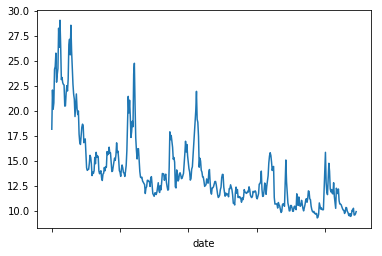

In [95]:
VIX_daily = convert_daily("VIX")
VIX_daily.close.plot()

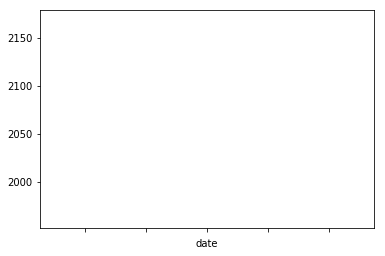

In [119]:
SPX_daily = convert_daily("SPX")
SPX_daily[(SPX_daily.close.pct_change()) < -0.02].close.plot()

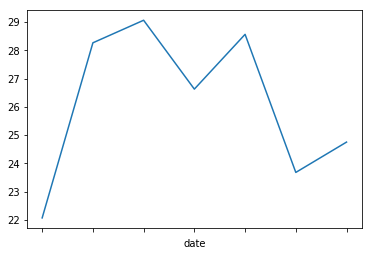

In [118]:
VIX_daily[(SPX_daily.close.pct_change()) < -0.02].close.plot()

In [103]:
VIX_daily[abs(SPX_daily.close.pct_change()) > 0.02]

,Unnamed: 0,open,high,low,close
date,,,,,
2016/01/04,101.785714,22.200000,22.518571,21.795000,22.072857
2016/01/15,1480.928571,28.402857,29.058571,27.840714,28.264286
2016/01/20,1787.071429,29.075714,29.670000,28.499286,29.062143
2016/02/08,3674.142857,26.619286,26.862857,26.305000,26.627143
2016/02/11,4133.857143,28.625714,29.117143,27.779286,28.563571
2016/06/24,18144.666667,23.692593,24.246296,22.991111,23.681481
2016/06/27,18297.481481,24.773333,25.087037,24.425556,24.753704
2016/06/29,18600.370370,17.363704,17.462222,17.203333,17.308889


In [104]:
VIX_daily['SPX_close'] = SPX_daily.close

In [113]:
VIX_daily[abs(SPX_daily.close.pct_change()) > 0.02][["close","SPX_close"]].corr()

,close,SPX_close
close,1.000000,-0.873239
SPX_close,-0.873239,1.000000
